# PFDA-Project-2019

## Programming for Data Analysis Project 2019 - Child Birth

### Simulating Data


### Child Birth Ireland

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sbn

Below code will be used so that the number of Irish children born can be simulated up to any positive integer, code to ensure number entered into variable is a positive integer adapted from [here.](https://www.quora.com/How-can-I-make-sure-the-user-inputs-a-positive-integer-in-Python)

In [2]:
# code below adapted from above link which prevents numbers less than 0 and non numeric characters being entered.

while True:
	try:
		number_births = int(input("Please enter the number of Irish births you would like to simulate: "))
		assert(number_births>0)
		break
	except:
		print("The number of births must be a positive integer, please try again.")

Please enter the number of Irish births you would like to simulate: 500


### Create Gender Data
After some initial research my simulation will focus on first time parents becasue as the birth order increases this can have an affect on the gender ratio of the child being born as discussed in (Ritchie & Roser, 2019). As the birth order increases there is a bias in favour of females being born, it may be possible to build this variation into my simulation however further research is required first.

The paper relating to the data used in the website by (Ritchie & Roser, 2019) on gender ratios is based off of the study completed (Chao, et al., 2019) , for the generation of the gender data used to validate there sample the authors used a normal distribution. This will also be the distribution I will use in the generation of the gender of the children born in my simulaiton.

In [3]:
gender_number = np.random.normal(loc=0.0, scale=1.0, size=number_births)

After generating the random numbers that I will use as the basis for determining the gender of the children in my simulation I plotted the data in a histogram to confirm the normal distribution of the data. I will create a text column that is linked to this number whereby numbers greater than 0 will be male and less than will be females.

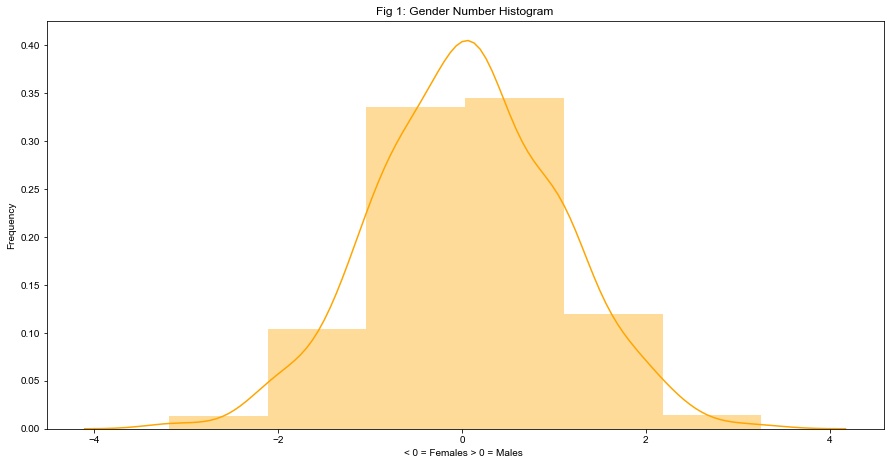

In [4]:
plt.rcParams["figure.figsize"] = (15,7.5)

sbn.distplot(gender_number, color='orange',  bins=6)
sbn.set_style("darkgrid")
plt.title('Fig 1: Gender Number Histogram')
plt.xlabel('< 0 = Females > 0 = Males ')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Convert from numpy array to pandas dataframe, this dataframe will house the data for my final submission

birth_data = pd.DataFrame(gender_number)
birth_data.columns = ['gender_number']

Code to create text of gender based on values gender number column adapted from [here.](https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column)

In [6]:
birth_data['gender_text'] = np.where(birth_data['gender_number']>0, 'Male', 'Female')
print(birth_data)

     gender_number gender_text
0        -1.119639      Female
1        -1.121054      Female
2        -0.091861      Female
3         0.015088        Male
4         0.828065        Male
5         0.970568        Male
6        -0.623027      Female
7         0.805802        Male
8         1.558070        Male
9        -0.236649      Female
10       -0.525506      Female
11        0.508404        Male
12       -0.297130      Female
13       -1.687731      Female
14        0.211746        Male
15       -0.201514      Female
16        0.449961        Male
17       -1.357263      Female
18       -0.644996      Female
19        0.582181        Male
20       -0.906859      Female
21        0.931711        Male
22        0.669479        Male
23       -0.426054      Female
24       -0.667606      Female
25       -0.024916      Female
26        0.143295        Male
27       -1.557438      Female
28        1.214088        Male
29        0.671688        Male
..             ...         ...
470     

### Create Gestation Length Data

Gestation period plays a huge role in the birth weight that a child will be when it is born, (Jukic, et al., 2013) describes several start points for starting the counting of days of gestation. For my analysis I will be using the Last Menstrual Period (LMP) as my start point for measuring the number of days of gestation.

The mean and standard deviation required to generate the gestational data were taken from (Jukic, et al., 2013), the type of distribution that represents gestation period can be seen in (Nassar, et al., 2013). 

Figure 1 taken from (Nassar, et al., 2013) shows the curve of the gestation period over the years 1994-2009 for Australian births, the resulting curve for 2009 apppears to follow a standard normal distribution.


![Figure 1](Resources/Figure_1.png)
**Figure 1**




For my simulation I will generate data for gestational period in days that follows this kind of curve.

In [7]:
# Mean 285 Standar Deviation 14 as per Table I (Jukic, et al., 2013)
# Numbers divided by 7 in order to get number of weeks to be used in birth weight calculation

birth_data['gestation_period'] = np.random.normal(loc=285, scale=14, size=number_births)/7

# Round Gestation Period to nearest whole number
birth_data['gestation_period'] = birth_data['gestation_period'].round(0)

### Create Weight Data

The study carried out in (Charnigo, et al., 2010) set out to model the distributions of birth weights in children. The author goes on to explain that different components of data can have an influence on the shape of the distributions such as smoking preference and ethnicity to name two.

For the purpose of this simulation as highlighted by the author of the above study I will be using a noraml distribution as thre are far too many components to account for all instances but I will use a different mean for either genders and the gestation age in the generation of the data.

In there study (Janssen, et al., 2007) descibed the mean and standard deviations of birth weights broken out by gestation period and gender, table 1 is taken from this study. 

For generating my data I will be using the european baby data, for gestation periods in my simulated data above 41 weeks and below 37 weeks I will combine them with the closest week number I have data for.


**Table 1**
![Table_1](Resources/Table_1.png)

Code to create new column in datafram using apply function adapted from [here](https://stackoverflow.com/questions/30631841/pandas-how-do-i-assign-values-based-on-multiple-conditions-for-existing-columns).

In [8]:
def f(birth_data):
  if birth_data['gender_text'] == "Male" and birth_data['gestation_period'] <= 37.0: return np.random.normal(loc=3336.4, scale=434.3, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 38 : return np.random.normal(loc=3359.4, scale=416.3, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 39 : return np.random.normal(loc=3586.0, scale=460.3, size=None)  
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 40 : return np.random.normal(loc=3687.6, scale=410.5, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] >= 41 : return np.random.normal(loc=3877.1, scale=384.4, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] <= 37 : return np.random.normal(loc=3050.7, scale=414.1, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 38 : return np.random.normal(loc=3293.5, scale=423.3, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 39 : return np.random.normal(loc=3455.8, scale=434, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 40 : return np.random.normal(loc=3639.5, scale=458.2, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] >= 41 : return np.random.normal(loc=3696.8, scale=448, size=None)
  else: return 0

birth_data['birth_weight'] = birth_data.apply(f, axis=1)

# Round birth weight to 0 decimals
birth_data['birth_weight'] = birth_data['birth_weight'].round(0)

### Create Length Data

Birth length is another important vairable when it comes to newborns and is monitored througout the development of the child, in there study (Janssen, et al., 2007)  also went on to describe the mean length and standard deviation of newborns by gender.

I will attempt to simulate this data also by generating the birth length in cm's for the newborns in my simulation utilising the normal distribution along with using gender and gestation age to impact the length at birth. Again the data used to generate the length of the children can be found above in table 1.

In [9]:
def f(birth_data):
  if birth_data['gender_text'] == "Male" and birth_data['gestation_period'] <= 37.0: return np.random.normal(loc=49.4, scale=2, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 38 : return np.random.normal(loc=49.4, scale=1.7, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 39 : return np.random.normal(loc=50.5, scale=1.9, size=None)  
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 40 : return np.random.normal(loc=50.8, scale=1.7, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] >= 41 : return np.random.normal(loc=51.4, scale=2.2, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] <= 37 : return np.random.normal(loc=47.4, scale=2.5, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 38 : return np.random.normal(loc=48.6, scale=1.8, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 39 : return np.random.normal(loc=49.4, scale=1.7, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 40 : return np.random.normal(loc=50.2, scale=1.8, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] >= 41 : return np.random.normal(loc=50.5, scale=1.6, size=None)
  else: return 0

birth_data['birth_length'] = birth_data.apply(f, axis=1)

# Round birth weight to 0 decimals
birth_data['birth_length'] = birth_data['birth_length'].round(1)

In [10]:
print(birth_data)

     gender_number gender_text  gestation_period  birth_weight  birth_length
0        -1.119639      Female              40.0        4049.0          50.4
1        -1.121054      Female              37.0        3373.0          48.0
2        -0.091861      Female              40.0        3861.0          50.6
3         0.015088        Male              39.0        3937.0          48.6
4         0.828065        Male              42.0        3127.0          49.2
5         0.970568        Male              42.0        3834.0          51.6
6        -0.623027      Female              40.0        3435.0          52.6
7         0.805802        Male              41.0        4133.0          51.1
8         1.558070        Male              40.0        3741.0          48.0
9        -0.236649      Female              41.0        3801.0          46.6
10       -0.525506      Female              42.0        3741.0          49.5
11        0.508404        Male              42.0        3798.0          50.9

In [11]:
birth_data.describe()

,gender_number,gestation_period,birth_weight,birth_length
count,500.000000,500.000000,500.000000,500.000000
mean,0.052802,40.744000,3643.888000,50.420400
std,0.998600,2.080173,466.383966,1.948964
min,-3.187504,34.000000,2061.000000,44.600000
25%,-0.627027,39.000000,3357.000000,49.200000
50%,0.061709,41.000000,3661.500000,50.400000
75%,0.742798,42.000000,3934.750000,51.700000
max,3.255717,47.000000,5134.000000,56.400000


### References

Central Statistics Office Ireland, Unknown. Vital Statistics Annual Report 2017 - Births 2017, Dublin: Central Statistics Office Ireland.

Chao, F., Gerland, P., Cook, A. R. & Alkema, L., 2019. Systematic assessment of the sex ratio at birth for all countries and estimation of national imbalances and regional reference levels. PNAS, 116(19), pp. 9303 - 9311.

Charnigo, R., Chesnut, L. W., LoBianco, T. & Kirby, R. S., 2010. Thinking outside the curve, part I: modeling birthweight distribution. BMC, 28 Jul.10(37).

Janssen, P. A. et al., 2007. Standards for the measurement of birth weight, length and head circumference at term in neonates of European, Chinese and South Asian ancestry. Open Medicine, 10 Jul, 1(2), pp. 74-88.

Jukic, A. M. et al., 2013. Length of human pregnancy and contributors to its natural variation. Human Reproduction, 6 Aug, 28(10), pp. 2848 - 2855.

Ritchie, H. & Roser, M., 2019. Gender Ratio. [Online] 
Available at: https://ourworldindata.org/gender-ratio
[Accessed 01 Onward December 2019].

Walsh, A.-M., 2008. Big is beautiful as experts dispel 'sumo baby' myth. [Online] 
Available at: https://www.independent.ie/irish-news/big-is-beautiful-as-experts-dispel-sumo-baby-myth-26454311.html
[Accessed 01 Onward December 2019].

##### 